# Connecting vs promoting variables

## Main takeaway
You should promote variables up a level if they are generally useful at that level or used in many components, whereas you should connect variables if you need more precise control of where the data is being passed.

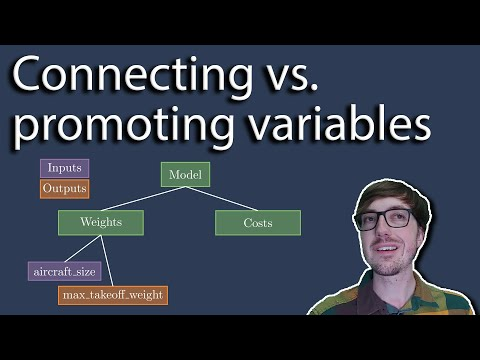

In [1]:
from IPython.display import YouTubeVideo; YouTubeVideo('hP1ZpzrVDo8', width=1024, height=576)

## Notes and context
There is already a [fantastic OpenMDAO doc page on about connections vs. promotions](https://openmdao.org/newdocs/versions/latest/basic_user_guide/multidisciplinary_optimization/linking_vars.html). Please see that for an in-depth API discussion and examples of usage.

This lesson is an extremely basic glimpse into the ideas of connecting and promoting variables. Other lessons have more examples about when to use which method, but most of your understanding will probably come from building your own models. Here, we really focus on introducing the terminology and explaining the differences in the OpenMDAO framework.

## What does connecting mean?
[Connecting](https://openmdao.org/newdocs/versions/latest/features/core_features/working_with_groups/connect.html) means that you specifically call out where the variable is coming from and going. This allows precise control over the variable passing. This is especially useful when you might have multiple versions of something with the same name and want to keep them separate. For instance, the cargo load of a singular plane within a fleet of multiple planes.

Connecting often takes a bit more time and effort to get right as you need to know where in your model the variables live that you want to connect.

There are some handy Python manipulations to help you achieve a fully connected model a bit faster. [F-strings](https://peps.python.org/pep-0498/) are amazingly helpful, and if you have many connections coming from the same models you can add shortcuts to make your code more readable.

It's also a bit easier to do connections that are based on logic (like if-then statements) as compared to promotions, where it's a bit more tedious to construct a list of variables to promote.

## What does promoting mean?
[Promoting](https://openmdao.org/newdocs/versions/latest/features/core_features/working_with_groups/add_subsystem.html) is when you push a variable up a level. This allows it to come from the component level and go up to the group level. Then, any component or group that also promotes that variable has access to it within that group. Within a nested group hierarchy, you can promote variables up to any level within that structure. 

You must promote both the inputs and outputs if you want them to be linked. OpenMDAO specifically has different keyword args (`promotes_inputs` and `promotes_outputs`) so you can extremely clear about what types of variables you're promoting. Or, you can just say `promotes` and OpenMDAO will promote the variable regardless if it's an input or output. It's generally better to use `promotes_inputs` and `promotes_outputs` instead of `promotes` to make your code much more clear to others who look at it.

You can also change the name of what you're promoting by using a tuple instead of just the string of the name.

An advanced topic is promoting with a wildcard (`promotes=["*"]`), which can be used instead of individually listing each variable to promote. It might be valid for small models but becomes untenable with larger models. We highly suggest you explicitly name what you are promoting to make it clear what is coming in and out of the system. Otherwise somebody who uses your model might not know about all of the variables coming out of it.

## Absolute vs promoted names
In OpenMDAO, there are two types of names for a single variable. There's the absolute name, which is where it lives in absolute terms within the model. This means that all groups and components are represented in the name. If you have a very nested variable, this name might be quite long.

There's also the promoted name, which is a moniker available when you promote variables. You can access variables via this name once you pass them up to different levels.

## When to use what
Knowing when to use connections vs. promotion is subjective and something that you learn by building multiple models or tools. I'll briefly discuss some reasons here, but also know that this will come up in other lessons. A good way to learn when to do what is to look at existing tools and draw from them.

Generally, if many different components need to use specific variables, it makes sense to promote them up to the shared group level so you don't have to issue many connection statements. Here the process is simplified if all the components that need that variable information already live within the same group.

On the other hand, connecting variables makes your data-passing extremely explicit within your model setup. This might make it easier to debug and understand your model. This is especially true if you're given a model from someone else and you want to combine it with yours. You might not know all the variables within their model and you only want to connect certain parts of their model to yours; connections make sense in that case.